# 앙상블(ensemble)
앙상블(emsemble) 모형은 여러개의 분류모형에 의한 결과를 종합하여 분류의 정확도를 높이는 방법이다.  
이는 적절한 표본추출법으로 데이터에서 여러개의 훈련용 데이터 집합을 만들어 각각의 데이터 집합에서 하나의 분류기를 만들어 앙상블하는 방법이다.

# Bagging

배깅(bagging)은 bootstrap aggregating의 준말로 원 데이터 집합으로부터 크기가 표본을 여러번 단순 임의 복원추출하여 각 표본(이를 붓스트랩 표본이라 함)에 대해 분류기(classifiers)를 생성한 후 그 결과를 앙상블하는 방법이다.

반복추출 방법을 사용하기 때문에 같은 데이터가 한 표본에 여러번 추출될 수 있고, 어떤 데이터는 추출되지 않을 수도 있다.

iris 자료에 대해 R 패키지 {adabag}의 bagging() 함수를 통해 분석을 수행한다.

In [4]:
library(adabag)
data(iris)
iris.bagging <- bagging(Species~., data=iris, mfinal=10)
iris.bagging$importance

Loading required package: rpart
Loading required package: caret
Loading required package: lattice
Loading required package: ggplot2
Loading required package: foreach
Loading required package: doParallel
Loading required package: iterators
Loading required package: parallel


Petal.Length  Petal.Width Sepal.Length  Sepal.Width 
     72.3351      27.6649       0.0000       0.0000

R 패키지 {adabag}의 bagging() 함수는 배깅을 이용하여 분류를 수행한다.  
plot() 함수를 통해 분류 결과를 트리 형태로 나타낼 수 있다.

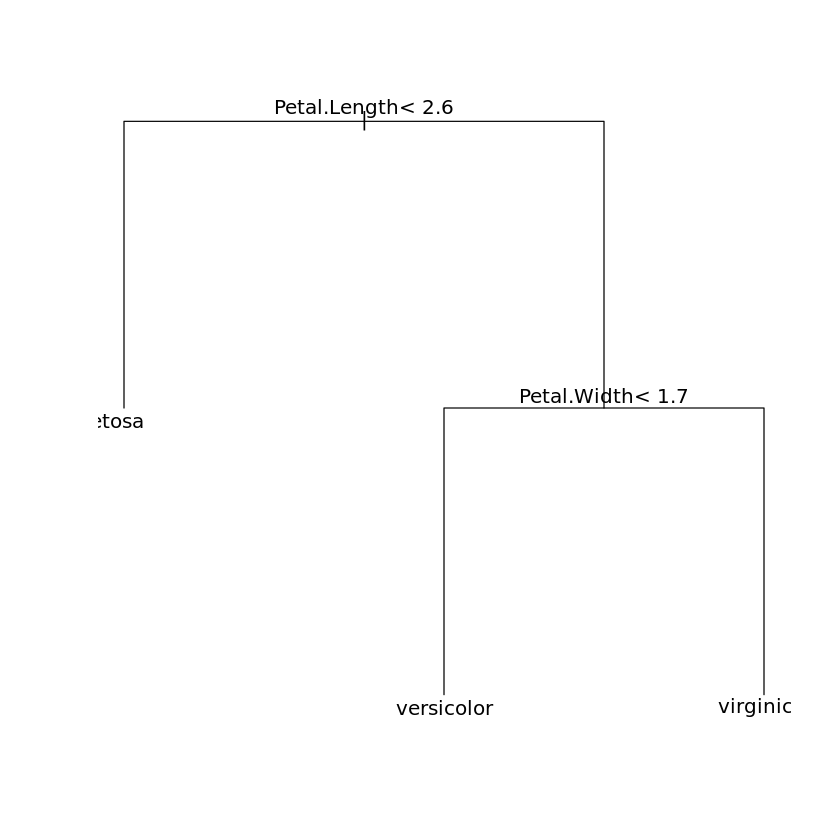

In [5]:
plot(iris.bagging$trees[[10]])
text(iris.bagging$trees[[10]])

predict() 함수를 통해 새로운 자료에 대한 분류(예측)를 수행할 수 있다.  
여기서는 모형 구축에 사용된 자료를 재사용하여 분류를 수행하였다.  
그 결과 setosa는 50개 모두, versicolor는 50개 중 45개, virginica는 50개 중 49개가 제대로 분류되었다.

In [7]:
pred <- predict(iris.bagging, newdata=iris)
table(pred$class, iris[,5])

            
             setosa versicolor virginica
  setosa         50          0         0
  versicolor      0         48         5
  virginica       0          2        45

# Boosting

부스팅(boosting)은 배깅의 과정과 유사하나 붓스트랩 표본을 구성하는 재표본(re-sampling) 과정에서 각 자료에 동일한 확률을 부여하는 것이 아니라, 분류가 잘못된 데이터에 더 큰 가중을 주어 표본을 추출한다.  

부스팅에서는 붓스트랩 표본을 추출하여 분류기를 만든 후, 그 분류결과를 이용하여 각 데이터가 추출될 확률을 조정한 후, 다음 붓스트랩 표본을 추출하는 과정을 반복한다.

##### iris 자료에 대해 R 패키지 {adabag}의 boosting() 함수를 통해 분석을 수행한다.

In [8]:
library(adabag)
data(iris)
boo.adabag <- boosting(Species~., data=iris, boos=TRUE, mfinal=10)
boo.adabag$importance

Petal.Length  Petal.Width Sepal.Length  Sepal.Width 
   62.220395    26.949657     4.488278     6.341670

R 패키지 {adabag}의 boosting() 함수는 부스팅을 이용하여 분류를 수행한다.  
plot() 함수를 통해 분류 결과를 트리 형태로 나타낼 수 있다.

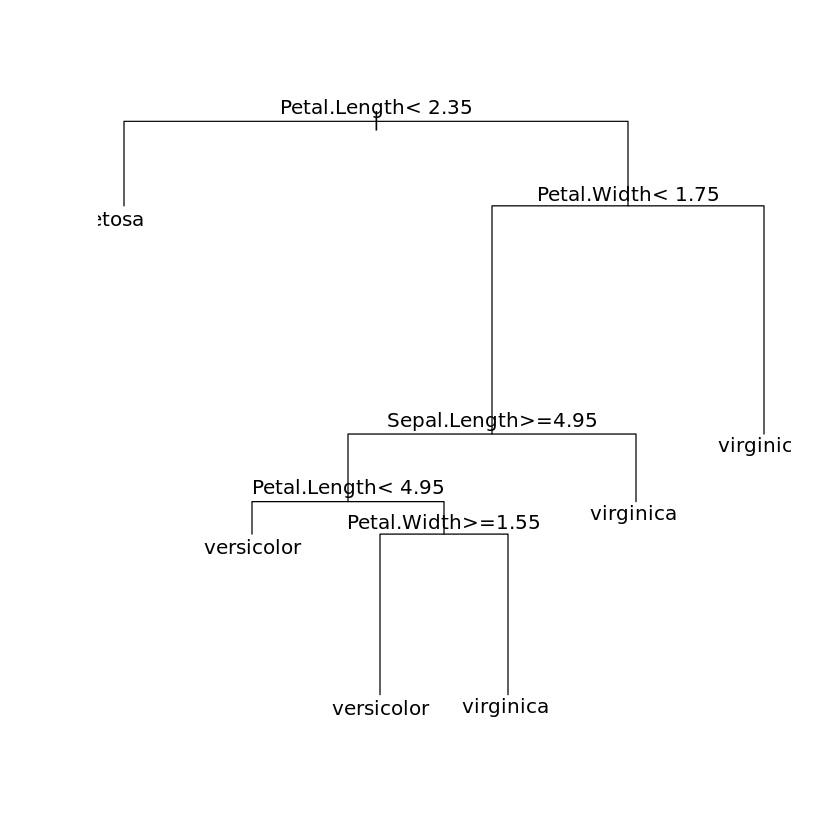

In [9]:
plot(boo.adabag$trees[[10]])
text(boo.adabag$trees[[10]])

predict() 함수를 통해 새로운 자료에 대한 분류(예측)를 수행할 수 있다.  
여기서는 모형 구축에 사용된 자료를 재사용하여 분류를 수행하였다.  
그 결과 setosa, versicolor, virginica 모두 정확히 분류되었음을 알 수 있다.

In [10]:
pred <- predict(boo.adabag, newdata=iris)
tb <- table(pred$class, iris[,5])
tb

            
             setosa versicolor virginica
  setosa         50          0         0
  versicolor      0         50         0
  virginica       0          0        50

위의 결과로부터 오분류율을 계산하면 다음과 같이 그 값이 0임을 알 수 있다.

In [11]:
error.rpart <- 1-(sum(diag(tb)/sum(tb)))
error.rpart

[1] 0

##### R 패키지 {ada}의 ada() 함수를 이용하여 아다부스팅을 이용한 분류를 수행한 예제이다.

In [17]:
library(ada)
data(iris)
iris[iris$Species!="setosa", ]->iris   # setosa 50개 자료 제외
n<-dim(iris)[1]
n

[1] 100

총 100개의 자료를 60개의 훈련용 자료(training data)와 검증용 자료(testing data)로 나누었다.

In [18]:
trind <- sample(1:n, floor(.6*n), FALSE)
teind <- setdiff(1:n, trind)
iris[,5]<-as.factor(levels(iris[, 5])[2:3])[as.numeric(iris[, 5])-1]

훈련용 데이터를 이용하여 부스팅 방법으로 모형을 구축하고, 검증용 자료에 대해 분류(예측)를 실시하였다.  
그 결과 검증용 자료에 대한 정분류열이 100%로 나타났다.

In [20]:
gdis<-ada(Species~., data=iris[trind,], iter=20, nu=1, type="discrete")
gdis<-addtest(gdis, iris[teind, -5], iris[teind, 5])
gdis

Call:
ada(Species ~ ., data = iris[trind, ], iter = 20, nu = 1, type = "discrete")

Loss: exponential Method: discrete   Iteration: 20 

Final Confusion Matrix for Data:
            Final Prediction
True value   versicolor virginica
  versicolor         32         0
  virginica           0        28

Train Error: 0 

Out-Of-Bag Error:  0.017  iteration= 11 

Additional Estimates of number of iterations:

train.err1 train.kap1 test.errs2 test.kaps2 
        13         13          4          4 


##### plot(), varplot(), pairs() 함수를 이용하여 부스팅 결과를 시각화 한 결과는 다음과 같다.

아래의 plot() 함수는 오차와 일치도를 나타내는 카파(kappa) 계수를 그려준다.  
두 개의 TRUE 옵션은 훈련용, 검증용 자료 모두에 대해 그림을 그려준다.

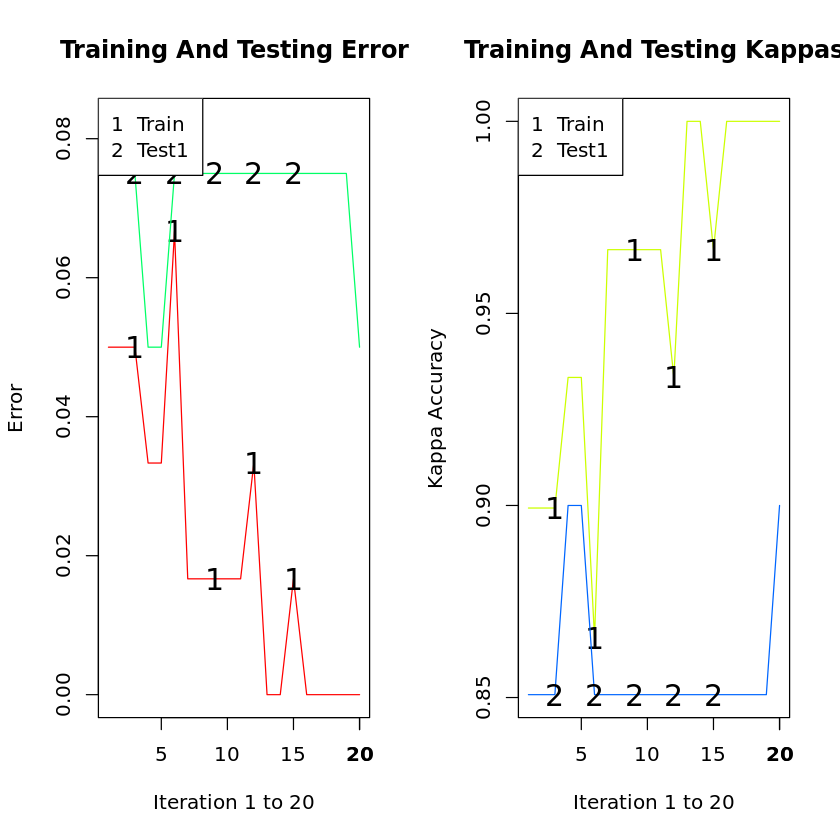

In [21]:
plot(gdis, TRUE, TRUE)

varplot() 함수는 변수의 중요도(importance)를 나타내는 그림을 제공한다.  
Sepal.Length 변수가 분류에 가장 중요한 변수로 사용되었음을 보여준다.

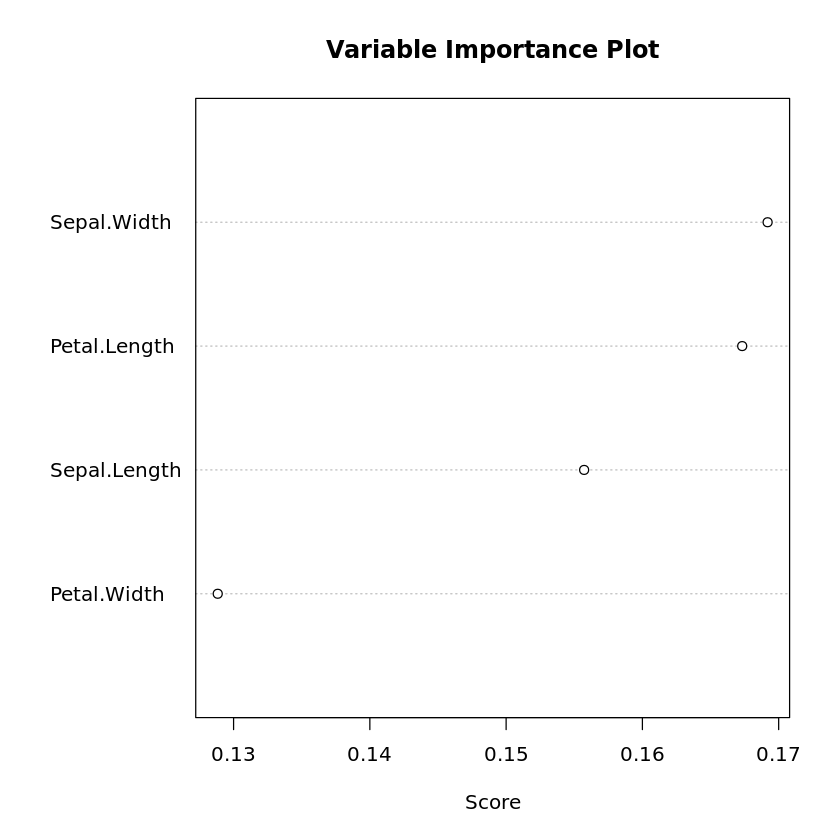

In [22]:
varplot(gdis)

pairs() 함수는 두 예측변수의 조합별로 분류된 결과를 그려준다.  
maxvar= 옵션을 통해 변수의 수(중요도가 높은 상위 변수의 수)를 지정할 수 있다.

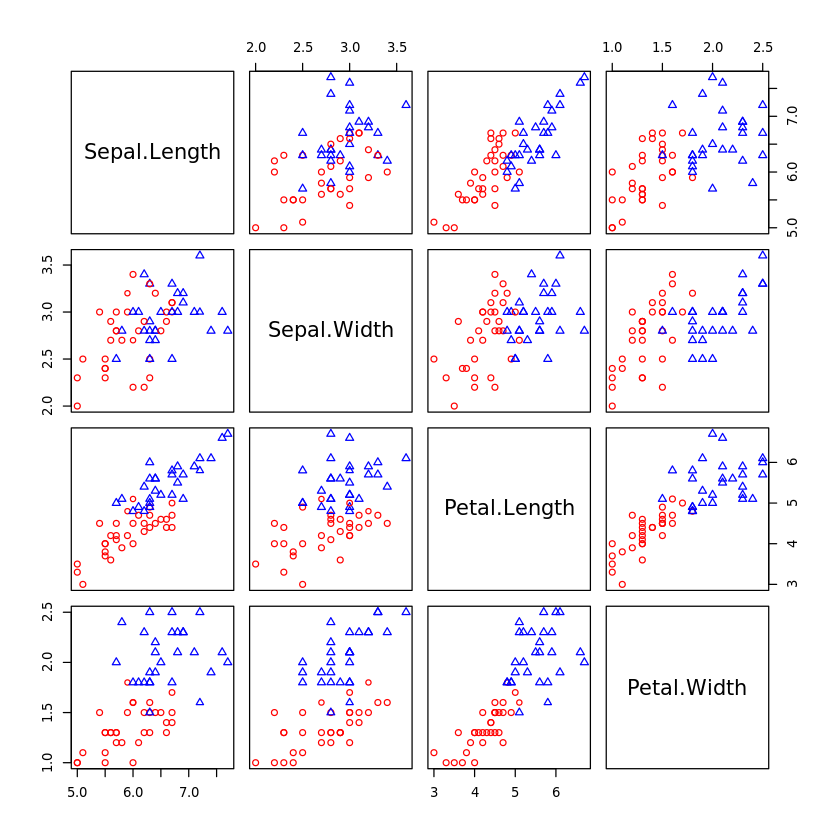

In [24]:
pairs(gdis, iris[trind, -5], maxvar=4)

# Random forest

랜덤포레스트(random forest)는 배깅에 랜덤 과정을 추가한 방법이다.  
각 노드마다 모든 예측변수 안에서 최적의 분할(split)을 선택하는 방법 대신 예측변수들을 임의로 추출하고, 추출된 변수 내에서 최적의 분할을 만들어 나가는 방법을 사용한다.  

분류(classification)의 경우는 다수결(majority votes)로, 회귀(regression)의 경우에는 평균을 취하는 방법을 사용하며, 이는 다른 앙상블 모형과 동일하다.

Decision tree 분석에 사용되었던 ploidy 자료에 대해 randomForest() 함수를 이용하여 분석을 수행한다.

In [28]:
library(randomForest)
library(rpart)
data(rpart)
data(stagec)
stagec3 <- stagec[complete.cases(stagec),]
set.seed(1234)
ind <- sample(2, nrow(stagec3), replace=TRUE, prob=c(0.7, 0.3))
trainData <- stagec3[ind==1,]  # n=102개
testData <- stagec3[ind==2,]  # n=32개
rf <- randomForest(ploidy ~ ., data=trainData, ntree=100, proximity=TRUE)
table(predict(rf), trainData$ploidy)

Warning message in data(rpart):
“data set ‘rpart’ not found”

            
             diploid tetraploid aneuploid
  diploid         45          0         3
  tetraploid       1         51         0
  aneuploid        2          0         0

In [29]:
print(rf)


Call:
 randomForest(formula = ploidy ~ ., data = trainData, ntree = 100,      proximity = TRUE) 
               Type of random forest: classification
                     Number of trees: 100
No. of variables tried at each split: 2

        OOB estimate of  error rate: 5.88%
Confusion matrix:
           diploid tetraploid aneuploid class.error
diploid         45          1         2      0.0625
tetraploid       0         51         0      0.0000
aneuploid        3          0         0      1.0000


위 결과는 정오표(confusion matrix)와 함께, 오류율에 대한 OOB(out-of-bag) 추정치를 제공한다.  
랜덤포레스트에서는 별도의 검증용 데이터를 사용하지 않더라도 붓스트랩 샘플과정에서 제외된(out-of-bag) 자료를 사용하여 검증을 실시할 수 있다.

아래의 plot() 함수는 트리 수에 따른 종속변수의 범주별 오분류율 나타낸다.  
검은색은 전체 오분류율을 나타낸다.  
오분류율이 1로 나타난 범주는 aneuploid 범주로 개체수가 매우 작은(n=3) 범주에서 발생된 결과이다.

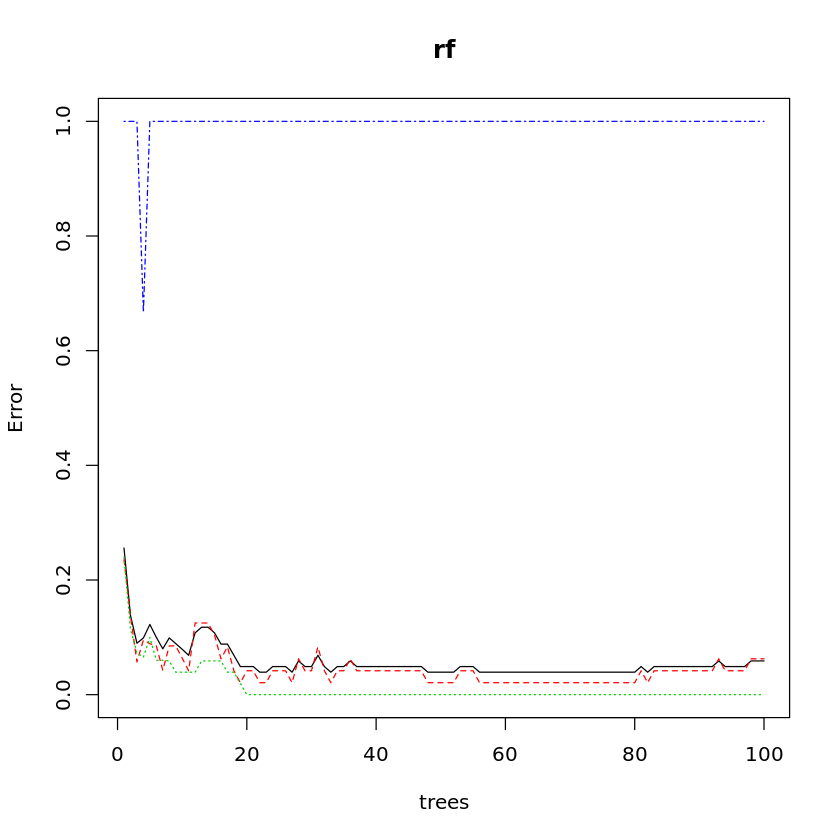

In [30]:
plot(rf)

importance()와 varImpPlot()로 변수의 중요성을 알 수 있다.

In [31]:
importance(rf)

,MeanDecreaseGini
pgtime,4.6800225
pgstat,2.0635061
age,3.5726107
eet,0.7875501
g2,37.5032896
grade,1.2084410
gleason,2.0820408


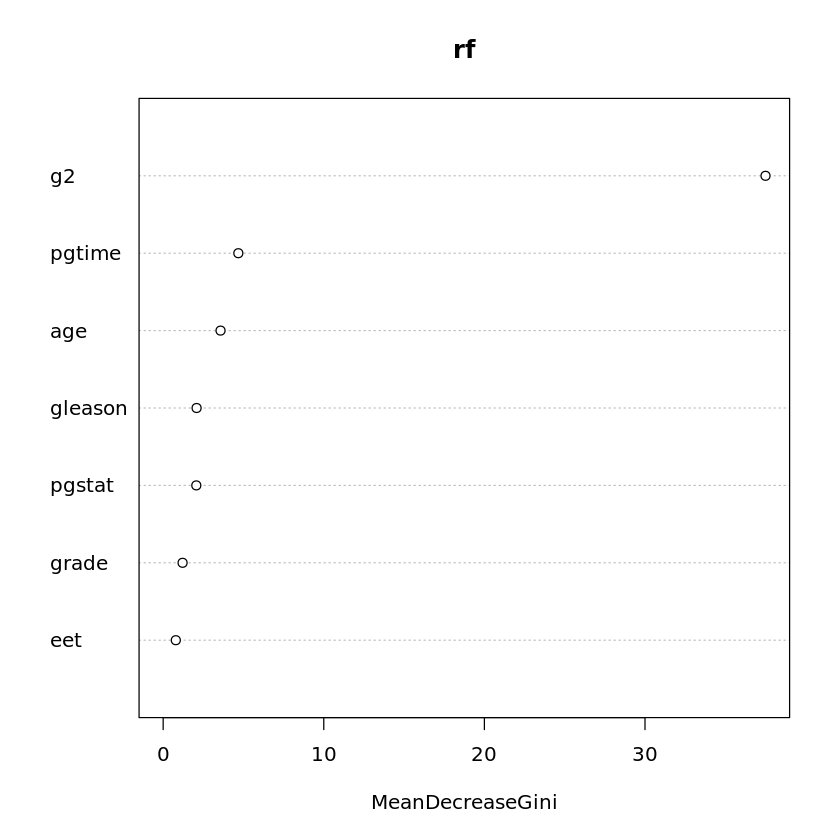

In [33]:
varImpPlot(rf)

위 그림은 해당 변수로부터 분할이 일어날 때 불순도(impurity)의 감소가 얼마나 일어나는지를 나타내는 값이다.(불순도의 감소가 클수록 순수도가 증가함). 지니 지수(residual sum of square)을 통해 측정된다.

다음은 테스트 자료에 대해 예측을 수행한 결과이다.

In [34]:
rf.pred <- predict(rf, newdata=testData)
table(rf.pred, testData$ploidy)

            
rf.pred      diploid tetraploid aneuploid
  diploid         17          0         1
  tetraploid       0         13         1
  aneuploid        0          0         0

아래의 그림은 훈련용 자료값(총 102개)의 마진을 나타낸다.  
마진(margin)은 랜덤포레스트의 분류기(classifiers) 가운데 정분류를 수행한 비율에서 다른 클래스로 분류한 비율의 최대치를 뺀 값을 나타낸다.  
즉, 양(positive)의 마진은 정확한 분류를 의미하며, 음(negative)은 그 반대이다.

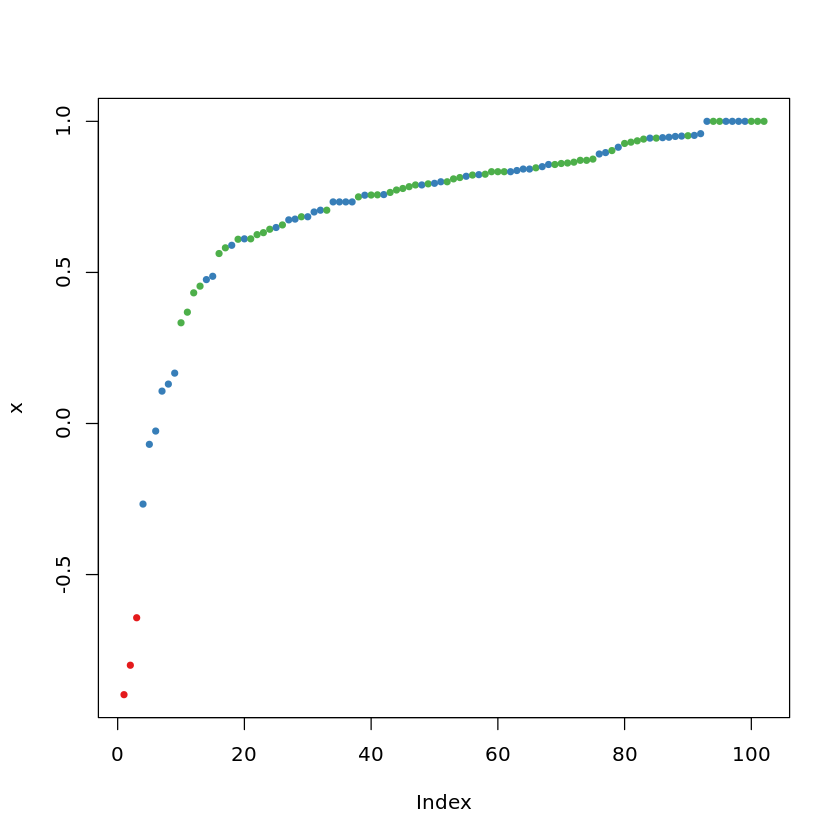

In [35]:
plot(margin(rf))